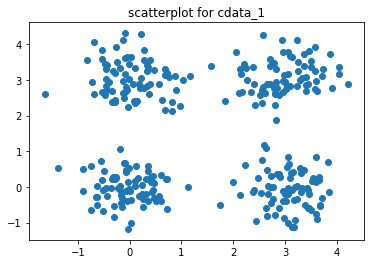



centroid values with 2 clusters:
 [[ 1.50639282  3.06687209]
 [ 1.50240543 -0.04861849]]


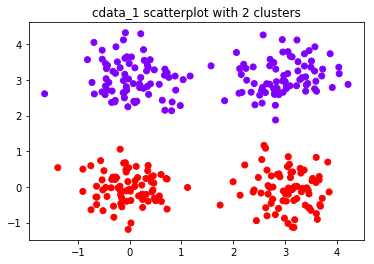

centroid values with 3 clusters:
 [[-0.0678092   0.02120743]
 [ 1.52752269  3.06993396]
 [ 3.0516314  -0.08391846]]


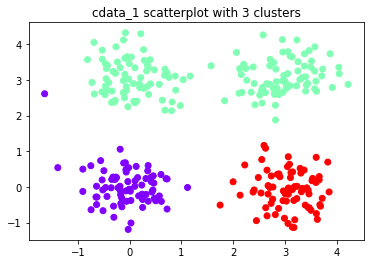

centroid values with 4 clusters:
 [[ 2.96895251  3.09162949]
 [-0.04682055 -0.01331852]
 [ 0.04383313  3.0421147 ]
 [ 3.0516314  -0.08391846]]


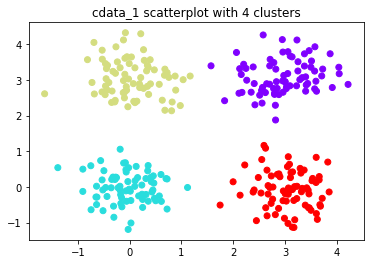

centroid values with 5 clusters:
 [[-0.04682055 -0.01331852]
 [ 3.40034135  3.33630456]
 [ 0.04383313  3.0421147 ]
 [ 3.0516314  -0.08391846]
 [ 2.57074743  2.86577557]]


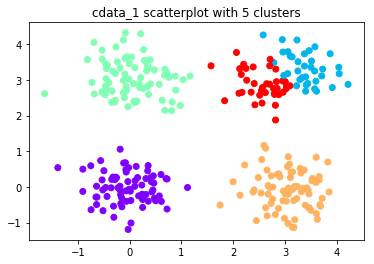

centroid values with 6 clusters:
 [[ 3.38171708  3.34278558]
 [-0.04682055 -0.01331852]
 [-0.23702166  3.48564401]
 [ 3.0516314  -0.08391846]
 [ 0.2417081   2.72962814]
 [ 2.56705016  2.84708276]]


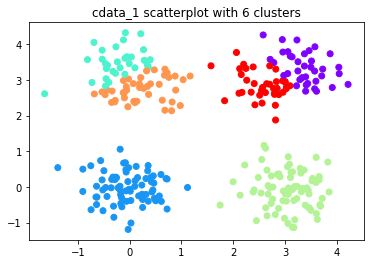


silhouette scores for cdata_1:

2 clusters:  0.4705591156593103
3 clusters:  0.5488538441101815
4 clusters:  0.6865348560101582
5 clusters:  0.6001839588020145
6 clusters:  0.5203164814771601




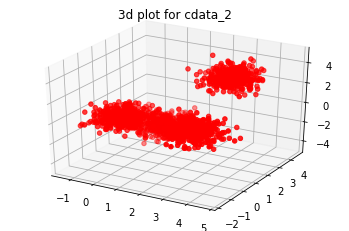



centroid values with 2 clusters:
 [[ 0.0108564   1.49930214 -1.5419214 ]
 [ 3.01462481  1.50356262  1.51455537]]


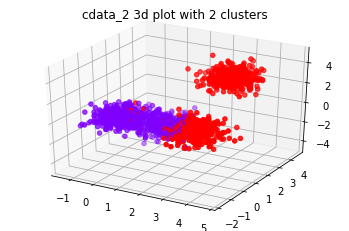

centroid values with 3 clusters:
 [[ 3.0213407   3.01762025  3.01789011]
 [ 0.0229216   3.02389088 -3.01258811]
 [ 1.50335006 -0.0178908  -0.03001703]]


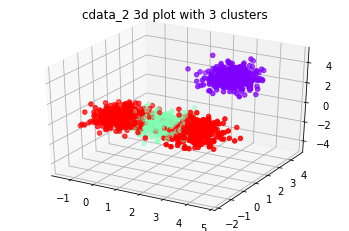

centroid values with 4 clusters:
 [[ 3.03106508 -0.00940023 -0.02204737]
 [ 0.0229216   3.02389088 -3.01258811]
 [ 3.0213407   3.01762025  3.01789011]
 [-0.02436496 -0.02638137 -0.0379867 ]]


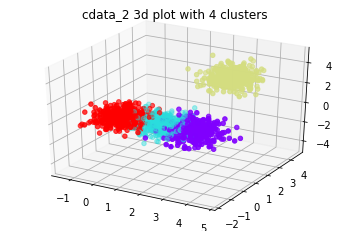

centroid values with 5 clusters:
 [[ 3.03106508 -0.00940023 -0.02204737]
 [ 0.05368514  2.75680241 -3.37932519]
 [ 3.0213407   3.01762025  3.01789011]
 [-0.02436496 -0.02638137 -0.0379867 ]
 [-0.00547551  3.27043408 -2.67406157]]


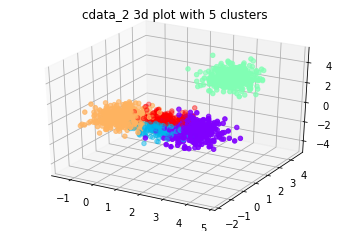

centroid values with 6 clusters:
 [[ 0.03919587  2.85247385 -3.46656876]
 [ 3.0494679  -0.00570049 -0.01750969]
 [ 3.0213407   3.01762025  3.01789011]
 [ 0.00974019  3.16273092 -2.64488432]
 [-0.23901027  0.15418015 -0.18455315]
 [ 0.39816682 -0.34584607  0.20233764]]


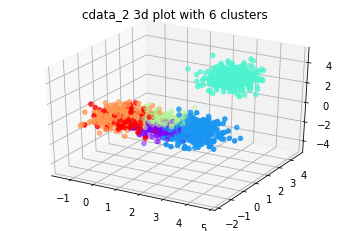


silhouette scores for cdata_2:

2 clusters:  0.44441804216078196
3 clusters:  0.6283730714180688
4 clusters:  0.6868161005750114
5 clusters:  0.5622751985495569
6 clusters:  0.44605897087230817


silhouette scores for seed data:

2 clusters:  0.5194475653884405
3 clusters:  0.4719337319126893
4 clusters:  0.41252802375298225
5 clusters:  0.36099452107873475
6 clusters:  0.36127102942872724


for 2 clusters:
homogeneity score: 0.4322359529864315
completeness score: 0.7055742906586695
v_measure score: 0.536072825198964 

for 3 clusters:
homogeneity score: 0.6934607041029826
completeness score: 0.696395547296022
v_measure score: 0.6949250270680578 

for 4 clusters:
homogeneity score: 0.7174591453498347
completeness score: 0.5740416506773128
v_measure score: 0.6377873453226987 

for 5 clusters:
homogeneity score: 0.7366856005600384
completeness score: 0.5110133198547736
v_measure score: 0.6034406991491756 

for 6 clusters:
homogeneity score: 0.7426631773118259
completeness score: 0.471081

In [6]:
# Victoria Rhine - Problem Set 3
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score

# import data files
seed_data = np.load('seed_data.npy')
cdata_1 = np.load('cdata1.npy')
cdata_2 = np.load('cdata2.npy')

# data labels in 1D array form.
data_labels = seed_data[:,7]

# first seven columns
seed_data = seed_data[:,:7]

# function to perform k-means clustering
def kClustering(num_clusters, data): 
    if np.array_equal(data, cdata_1):
        kmeans = KMeans(num_clusters)  
        kmeans.fit(cdata_1)
        print("centroid values with", num_clusters, "clusters:\n", kmeans.cluster_centers_)
        #plot the data
        plt.scatter(cdata_1[:,0], cdata_1[:,1], c = kmeans.labels_, cmap = 'rainbow') 
        label = "cdata_1 scatterplot with " + str(num_clusters) + " clusters"
        plt.title(label) 
        plt.show()
    elif np.array_equal(data, cdata_2):
        kmeans = KMeans(num_clusters)  
        kmeans.fit(cdata_2)
        print("centroid values with", num_clusters, "clusters:\n", kmeans.cluster_centers_)
        # plot the data
        fig = plt.figure()
        ax = fig.add_subplot(111, projection = '3d')
        X, Y, Z = cdata_2.T
        ax.scatter(X, Y, Z, c = kmeans.labels_, cmap = 'rainbow')
        label = "cdata_2 3d plot with " + str(num_clusters) + " clusters"
        plt.title(label) 
        plt.show()

# function to get silhouette score
def s_score(num_clusters, data): 
    if np.array_equal(data, cdata_1):
        kmeans = KMeans(num_clusters) 
        kmeans.fit(cdata_1)
        print(num_clusters, "clusters: ", 
              metrics.silhouette_score(cdata_1, kmeans.predict(cdata_1), metric = 'euclidean'))
    elif np.array_equal(data, cdata_2):
        kmeans = KMeans(num_clusters) 
        kmeans.fit(cdata_2)
        print(num_clusters, "clusters: ", 
              metrics.silhouette_score(cdata_2, kmeans.predict(cdata_2), metric = 'euclidean'))
    elif np.array_equal(data, seed_data):
        kmeans = KMeans(num_clusters) 
        kmeans.fit(seed_data)
        print(num_clusters, "clusters: ", 
              metrics.silhouette_score(seed_data, kmeans.predict(seed_data), metric = 'euclidean'))    

# function to get homogeneity, completeness, and v_measure score
# calculated separately versus one function for readability
def h_c_v_scores(num_clusters):
    kmeans = KMeans(num_clusters) 
    kmeans.fit(seed_data)
    print("for", num_clusters, "clusters:")
    print("homogeneity score:", metrics.homogeneity_score(data_labels, kmeans.predict(seed_data)))
    print("completeness score:", metrics.completeness_score(data_labels, kmeans.predict(seed_data)))
    print("v_measure score:", metrics.v_measure_score(data_labels, kmeans.predict(seed_data)), "\n")
    
print("\n==================================================\n")    

# problem 1 
# create 2D scatterplot of cdata_1
plt.scatter(cdata_1[:,0],cdata_1[:,1], label = 'True Position')  
plt.title("scatterplot for cdata_1") 
plt.show()
# ANSWER - I think I see 4 clusters. 

print("\n==================================================\n")  

# problem 2 - 5
# kmeans clustering on 2, 3, 4, 5, 6 clusters
# scatterplots for different clusters
kClustering(2, cdata_1)
kClustering(3, cdata_1)
kClustering(4, cdata_1)
kClustering(5, cdata_1)
kClustering(6, cdata_1)

# silhouette scores for cdata_1
print("\nsilhouette scores for cdata_1:\n")
s_score(2, cdata_1)
s_score(3, cdata_1)
s_score(4, cdata_1)
s_score(5, cdata_1)
s_score(6, cdata_1)

# problem 6
# I think 4 clusters captures the data best.
# This is confirmed with silhouette scores. 

print("\n==================================================\n")  

# problem 7
# create 3D scatterplot of cdata_2
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
X, Y, Z = cdata_2.T
ax.scatter(X, Y, Z, c = 'r', marker = 'o')
plt.title("3d plot for cdata_2") 
plt.show()

print("\n==================================================\n")  

# repeating previous process on cdata_2
# kmeans clustering on 2, 3, 4, 5, 6 clusters
# 3d plots for different clusters
kClustering(2, cdata_2)
kClustering(3, cdata_2)
kClustering(4, cdata_2)
kClustering(5, cdata_2)
kClustering(6, cdata_2)

# silhouette scores for cdata_2
print("\nsilhouette scores for cdata_2:\n")
s_score(2, cdata_2)
s_score(3, cdata_2)
s_score(4, cdata_2)
s_score(5, cdata_2)
s_score(6, cdata_2)

# ANSWER: 4 clusters best captures the data and the silhouette scores confirm this. 

print("\n==================================================\n")  

# problem 8
# silhouette scores for seed data
print("silhouette scores for seed data:\n")
s_score(2, seed_data)
s_score(3, seed_data)
s_score(4, seed_data)
s_score(5, seed_data)
s_score(6, seed_data)

# problem 9
# homogeneity, completeness, and v_measure scores for seed data
print("\n==================================================\n")  

h_c_v_scores(2)
h_c_v_scores(3)
h_c_v_scores(4)
h_c_v_scores(5)
h_c_v_scores(6)

# it does not appear the intrinsic and extrinsic fit measures agree on clusters
# using the intrinsic method (silhouette score), 2 clusters works best
# using the extrinsic method (h, c, v scores), the homogeneity for 2 clusters 
# is not very high which means the clusters are not very pure 